## Taller Arboles de decision
##### Monitor: Juan Nicolas Piedrahita Salas

#### Introducción a la inteligencia artificial 2023-01

Este dataset contiene información sobre reclutamiento de personal. El objetivo es predecir si un candidato será contratado o no. (dataset previamente limpiado)

### Importar librerias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Lectura de datos

In [2]:
X = pd.read_csv("X_recruitment_data.csv")
y = pd.read_csv("y_recruitment_data.csv").squeeze()

display(X, y)

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location
0,Male,Yes,0.0,Graduate,No,5139,0.0,Yes,Urban
1,Male,No,1.0,Graduate,No,4583,128.0,Yes,Rural
2,Male,No,0.0,Graduate,Yes,3000,66.0,Yes,Urban
3,Male,No,0.0,Not Graduate,No,2583,120.0,Yes,Urban
4,Male,Yes,0.0,Graduate,No,6000,141.0,Yes,Urban
...,...,...,...,...,...,...,...,...,...
609,Female,Yes,0.0,Graduate,No,2900,71.0,Yes,Rural
610,Male,No,3.0,Graduate,No,4106,40.0,Yes,Rural
611,Male,No,1.0,Graduate,No,8072,253.0,Yes,Urban
612,Male,No,2.0,Graduate,No,7583,187.0,Yes,Urban


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Recruitment_Status, Length: 614, dtype: int64

#### informacion del dataset

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Python_exp        614 non-null    object 
 2   Experience_Years  614 non-null    float64
 3   Education         614 non-null    object 
 4   Internship        614 non-null    object 
 5   Score             614 non-null    int64  
 6   Salary * 10E4     614 non-null    float64
 7   Offer_History     614 non-null    object 
 8   Location          614 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 43.3+ KB


#### existen filas duplicadas?

In [4]:
X.duplicated().any()

False

## Exploracion de datos

#### estadisticas descriptivas

In [42]:
X.describe()

,Experience_Years,Score,Salary * 10E4
count,614.000000,614.000000,614.000000
mean,0.744300,5402.302932,146.165261
std,1.009623,6109.024398,84.244922
min,0.000000,150.000000,0.000000
25%,0.000000,2877.500000,100.000000
50%,0.000000,3812.500000,128.500000
75%,1.000000,5771.500000,164.750000
max,3.000000,81000.000000,700.000000


#### variables categoricas

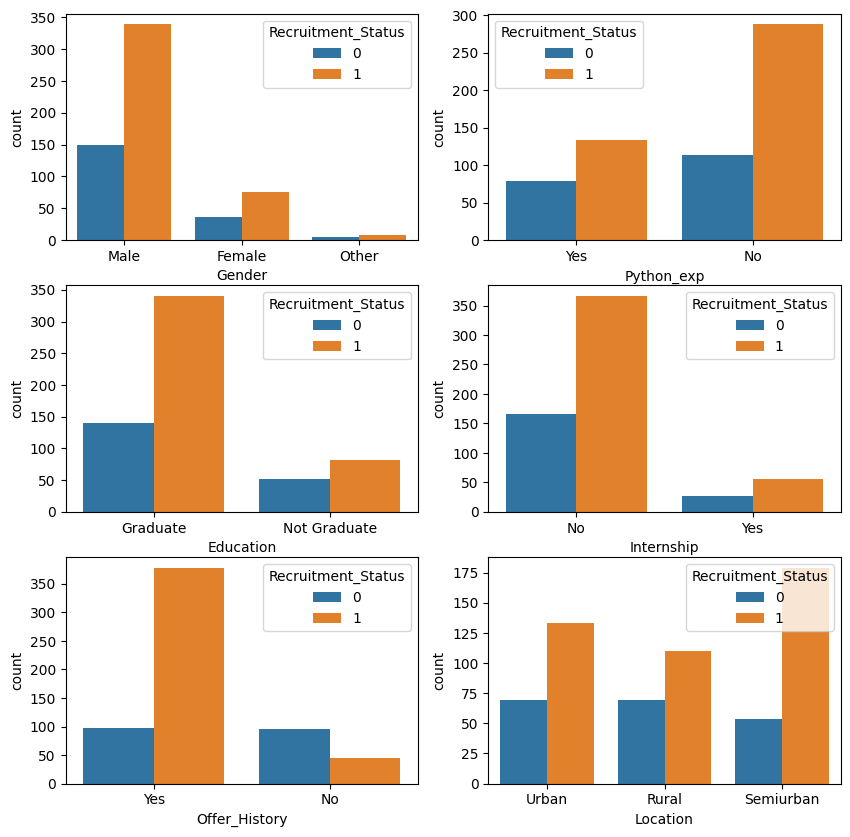

In [26]:
cat_cols = X.select_dtypes(include=['object']).columns.to_list()

X_y = pd.concat([X, y], axis=1)

_, ax = plt.subplots(3, len(cat_cols)//3, figsize=(10, 10))

ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=X_y, x=col, ax=ax[i], hue='Recruitment_Status')

plt.show()

#### variables numericas

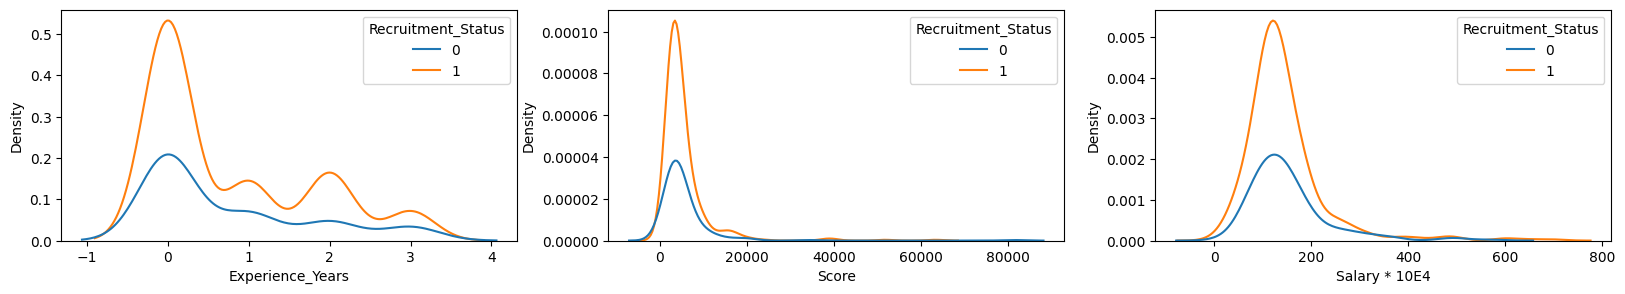

In [35]:
num_cols = X.select_dtypes(include=[np.number]).columns.to_list()

_, ax = plt.subplots(1, len(num_cols), figsize=(20, 3))

for i, col in enumerate(num_cols):
    sns.kdeplot(data=X_y, x=col, ax=ax[i], hue='Recruitment_Status')

plt.show()

### variable objetivo

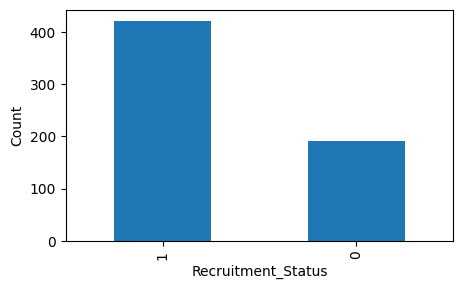

In [41]:
y.value_counts().plot.bar(figsize=(5, 3))

plt.xlabel("Recruitment_Status")
plt.ylabel("Count")
plt.show()

## Preparacion para la clasificacion